# Simulation of Prices of Coupon-Bearing Bonds using CIR

In [1]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [2]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [3]:
rates, zc_prices = erk.cir(10, 500, b=.03, r_0=.03)

In [4]:
rates

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.033052,0.030146,0.032002,0.031651,0.025497,0.028714,0.030350,0.034911,0.030854,0.031767,...,0.030657,0.028813,0.032134,0.028332,0.032340,0.032655,0.029910,0.029343,0.030052,0.028905
2,0.032047,0.029463,0.032542,0.031585,0.028781,0.023487,0.027815,0.035330,0.031717,0.031490,...,0.028266,0.029734,0.030210,0.028217,0.035390,0.029952,0.030095,0.034497,0.026021,0.026920
3,0.031037,0.028195,0.035449,0.032998,0.033213,0.023856,0.028409,0.039426,0.025103,0.029125,...,0.027603,0.031823,0.032720,0.026366,0.038025,0.030100,0.028327,0.034406,0.022572,0.023101
4,0.029499,0.030084,0.034256,0.032672,0.029887,0.019299,0.030826,0.042113,0.023981,0.030138,...,0.029460,0.027911,0.028685,0.023238,0.037495,0.026259,0.025316,0.037648,0.021852,0.025739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.015063,0.051861,0.019747,0.018812,0.042868,0.080230,0.049376,0.069125,0.000501,0.018314,...,0.033186,0.068084,0.011450,0.070916,0.043193,0.033589,0.011665,0.003990,0.038381,0.026168
117,0.015786,0.055590,0.019567,0.021747,0.043590,0.071270,0.049300,0.066532,0.000770,0.019984,...,0.030318,0.070940,0.011862,0.068124,0.044077,0.035412,0.011537,0.003941,0.034314,0.026288
118,0.014237,0.053959,0.017693,0.020985,0.047764,0.072867,0.051179,0.063475,0.000676,0.019010,...,0.028237,0.060134,0.010913,0.070991,0.044138,0.035122,0.009033,0.003748,0.031573,0.026758
119,0.014327,0.053131,0.019922,0.020549,0.047225,0.072999,0.053385,0.063706,0.000486,0.019060,...,0.031146,0.058383,0.011314,0.065367,0.045244,0.039774,0.006806,0.005690,0.026106,0.020960


In [5]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [6]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    109.204489
2    108.305933
3    108.475188
dtype: float64

<AxesSubplot:>

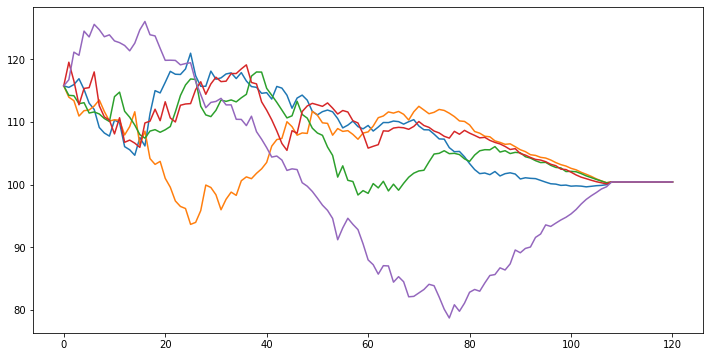

In [8]:
erk.bond_price(9, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,6))

제로쿠폰본드의 가격 움직임

In [9]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,117,115.276,115.6,121.45,118.35
2,117.514,114.675,115.548,118.153,123.259
3,118.569,111.98,114.158,113.965,122.723
4,116.687,112.94,114.347,116.868,127.054
...,...,...,...,...,...
116,99.9386,101.004,101.036,100.236,99.009
117,99.8615,100.758,100.704,100.159,99.4745
118,99.9345,100.537,100.482,100.037,99.6223
119,99.974,100.25,100.245,100.023,99.8095


In [17]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [23]:
117.26*(1.015387)**(-10)
# V0 = 117.26, Vt = 100 연수익률 환산하면 -1.5387%

100.65466355684475

In [11]:
br

,1,2,3,4,5
1,-0.002218,-0.016920,-0.014160,0.035729,0.009297
2,0.004389,-0.005219,-0.000445,-0.027143,0.041473
3,0.008978,-0.023496,-0.012034,-0.035445,-0.004347
4,-0.015869,0.008573,0.001653,0.025469,0.035289
5,-0.020582,0.001200,-0.015804,0.001348,-0.007929
...,...,...,...,...,...
116,-0.001354,-0.003215,-0.001723,-0.001033,0.005479
117,-0.000771,-0.002435,-0.003284,-0.000764,0.004702
118,0.000730,-0.002194,-0.002199,-0.001219,0.001486
119,0.000396,-0.002855,-0.002362,-0.000140,0.001879


In [20]:
btr

,1,2,3,4
1,0.00133488,-0.0133664,-0.0106063,0.0392826
2,0.00794985,-0.00160461,0.00315923,-0.0237124
3,0.0125234,-0.0198626,-0.00842781,-0.0319181
4,-0.0123551,0.0122936,0.00530275,0.029125
5,-0.0170112,0.00488957,-0.0121597,0.00491306
...,...,...,...,...
116,0.00280931,0.000896804,0.00239417,0.00311969
117,0.00339783,0.00169023,0.00084044,0.00339314
118,0.00490281,0.00194114,0.00193838,0.00294154
119,0.00456525,0.00128953,0.00178492,0.00402512


In [19]:
p = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, .05, 12)  ## 쿠폰 수익률 5%인 채권의 수익률
erk.annualize_rets(btr, 12)

1    0.030691
2    0.031497
3    0.031233
4    0.030237
dtype: float64

10년 만기 쿠폰채권을 가진 경우 연수익률이 약 3% 이내

In [28]:
price_10 = erk.bond_price(10, 100, .05, 12, rates)  ## 10년채
price_30 = erk.bond_price(30, 100, .05, 12, rates)  ## 20년채

In [29]:
price_10[[1,2,3]].tail()

,1,2,3
116,99.9386,101.004,101.036
117,99.8615,100.758,100.704
118,99.9345,100.537,100.482
119,99.974,100.25,100.245
120,100.417,100.417,100.417


In [30]:
price_30[[1,2,3]].tail()  ## 아직 만기가 안됐기 때문에 가격이 모두 다름

,1,2,3
116,97.6642,150.63,152.662
117,93.2149,150.848,146.245
118,95.1408,154.763,147.675
119,96.1393,149.752,148.428
120,95.0728,144.589,144.952


In [31]:
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
# 수익률 계산

In [32]:
rets_bonds = (.6*rets_10) + (.4*rets_30)  ## 10년채랑 30년채 mix

In [33]:
rets_10

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,-0.021577,0.00133488,-0.0133664,-0.0106063,0.0392826,0.0128506,-0.000296086,-0.0359112,-0.00430531,-0.0115242,...,-0.00273663,0.0120467,-0.0144087,0.0159453,-0.0160186,-0.0184854,0.00322121,0.00777369,0.0020821,0.0113045
2,0.0107458,0.00794985,-0.00160461,0.00315923,-0.0237124,0.0449935,0.0229005,-0.00039894,-0.00425603,0.00485066,...,0.0217472,-0.00489278,0.0180684,0.00328129,-0.0211389,0.0244038,0.00102637,-0.0375838,0.0351291,0.0183472
3,0.0106572,0.0125234,-0.0198626,-0.00842781,-0.0319181,-0.000966463,-0.0023732,-0.0285859,0.0563281,0.0214499,...,0.00761266,-0.0138526,-0.0170643,0.0171053,-0.0174725,0.00132928,0.0165685,0.00359084,0.0299385,0.0330117
4,0.0147138,-0.0123551,0.0122936,0.00530275,0.029125,0.0386845,-0.0163956,-0.0172892,0.0109808,-0.00547907,...,-0.0121703,0.0337831,0.0348243,0.0271552,0.0072923,0.0331265,0.0263171,-0.0220457,0.0075864,-0.0186522
5,-0.0043065,-0.0170112,0.00488957,-0.0121597,0.00491306,-0.00464931,-0.0317572,0.00844793,0.025455,-0.0169478,...,0.0138469,0.00347407,0.031025,-0.0163424,-0.0134137,0.0133971,-0.000713652,-0.0243403,0.0279083,0.00917548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.00234049,0.00280931,0.000896804,0.00239417,0.00311969,0.00971064,0.0033022,0.0069552,-1.82282e-05,0.00286226,...,0.00262585,0.00475571,3.55297e-05,0.00677485,0.00339149,0.00161992,0.00170578,-8.81308e-05,0.00152944,0.0025029
117,0.00107616,0.00339783,0.00169023,0.00084044,0.00339314,0.00891051,0.00413339,0.00640349,-2.48178e-05,0.00111245,...,0.00347706,0.00496599,0.000852046,0.00660209,0.00338018,0.00234727,0.00100364,0.000344809,0.0042073,0.00215082
118,0.00157198,0.00490281,0.00194114,0.00193838,0.00294154,0.00567456,0.00379725,0.00605078,7.96307e-05,0.00182663,...,0.00287117,0.00770396,0.00114587,0.00520222,0.00366285,0.00299896,0.00137639,0.000360433,0.00331369,0.00211275
119,0.00117896,0.00456525,0.00128953,0.00178492,0.00402512,0.00606138,0.00408194,0.00527053,7.2148e-05,0.00157998,...,0.00211178,0.00515643,0.000876119,0.00638295,0.00358642,0.00254097,0.000937608,0.00015116,0.003085,0.00271122


In [43]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
0,0.035401,0.003364,0.262854,2.714471,-0.001381,-0.001093,1.562718,0.0


In [45]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=.07, sigma=.15)
price_eq.shape

(121, 500)

In [48]:
rets_eq = price_eq.pct_change().dropna()
rets_eq  ## 주식 수익률

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.100835,0.024418,0.032971,-0.055034,-0.007304,0.032753,0.027067,0.003671,0.018435,-0.028667,...,-0.076191,0.018540,0.057770,-0.025618,-0.055747,0.007282,0.029023,0.042758,-0.018350,0.114102
2,0.008662,-0.065086,-0.044704,-0.007883,-0.005347,-0.036231,-0.022500,0.043882,-0.000551,-0.033125,...,0.042860,-0.033400,0.051886,0.054871,0.042267,0.006647,-0.040468,0.021718,-0.013153,0.002776
3,-0.035781,0.076658,0.020698,0.106630,-0.035535,0.059842,0.029400,0.086919,-0.025425,-0.003100,...,-0.005073,0.027516,0.069669,0.000328,0.039066,0.102600,-0.029829,0.035904,-0.030881,-0.031823
4,-0.051193,-0.021618,0.058635,-0.007363,0.041440,-0.003871,-0.062635,-0.007090,-0.023113,-0.009764,...,-0.015755,0.038913,-0.000198,0.008793,0.033345,-0.111583,0.052492,0.046304,0.057372,0.029639
5,0.041714,-0.043154,0.014863,0.020799,-0.048953,0.011316,0.014830,-0.029537,0.009582,-0.075233,...,0.033185,-0.037768,0.018490,0.040832,-0.027889,0.063531,-0.017524,0.034616,-0.032784,-0.008071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-0.009842,0.015155,0.021199,0.045957,-0.006822,-0.015060,0.006336,0.036857,0.017092,0.113675,...,0.058093,0.043015,0.060995,0.042457,0.014054,0.056776,-0.061890,-0.050570,-0.071140,-0.026427
117,-0.017239,0.056507,0.056036,-0.049940,-0.001584,-0.075838,0.037110,0.066789,-0.015356,0.016948,...,0.036473,0.005908,0.045741,0.062538,0.105674,-0.066122,0.000962,-0.002501,0.062656,0.073820
118,0.030760,0.020328,0.005048,0.038589,0.024564,-0.001996,-0.001520,0.014853,-0.039203,-0.039827,...,0.014328,0.043181,0.026150,0.006288,0.007948,0.031200,0.017995,0.059347,-0.010285,0.029417
119,0.047753,0.000846,-0.000369,-0.027929,0.031679,0.069166,0.079134,0.001665,0.013542,0.002390,...,-0.012427,0.015229,-0.042172,-0.016332,-0.013021,-0.018406,0.006134,0.034717,-0.038134,0.026636


In [51]:
rets = (.7*rets_eq) + (.3*rets_bonds)  ## 주식이랑 채권 mix
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
0,0.057794,0.004285,-0.178896,2.695917,-0.002598,-0.002094,6.313567,0.0


그럼 채권과 주식 비율을 어느정도로 맞추는게 제일 최적일까?

# Naive Risk Budgeting Strategies between the PSP and GHP

In [52]:
def bt_mix(r1, r2, allocator, **kwargs):
    """
    수익률 r1, r2의 조합
    """
    if not r1.shape == r2.shape:
        raise ValueError("r1 and r2 need to be the same shape")
    weights = allocator(r1, r2, **kwargs)
    if not weights.shape == r1.shape:
        raise ValueError("Allocator returned weights that dont match r1")
    r_mix = weights*r1 + (1-weights)*r2
    return r_mix


In [56]:
def fixedmix_allocator(r1, r2, w1, **kwargs):
    """
    w1으로 고정된 weight
    """
    return pd.DataFrame(data=w1, index=r1.index, columns=r1.columns)

In [58]:
rates, zc_prices = erk.cir(10, 500, b=.03, r_0=.03)
price_10 = erk.bond_price(10, 100, .05, 12, rates)  ## 10년채 가격 변동
price_30 = erk.bond_price(30, 100, .05, 12, rates)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)  ## 10년채 수익률
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)

In [59]:
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator=erk.fixedmix_allocator, w1=.6)  ## 0.6 / 0.4 비율

In [60]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
0,0.035651,0.0035,0.194727,3.02091,-0.001326,-0.000991,1.571348,0.0


In [61]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=.07, sigma=.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [62]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.fixedmix_allocator, w1=.7)
# 브라운모형을 이용한 주식 수익률과 위에서 만든 10년, 30년(60:40) 채권 수익률을 70:30으로 한 경우 수익률

In [63]:
rets_7030b_mean = rets_7030b.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_7030b_mean))  ## 이건 수익률 평균을 구한 다음 각 수치를 계산

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
0,0.060025,0.004522,-0.548057,2.788986,-0.002531,-0.001928,6.462629,0.0


In [66]:
summaries = erk.summary_stats(rets_7030b)  ## 각각 시나리오

In [67]:
summaries.head()

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
0,0.051887,0.106762,-0.116613,2.699044,0.046983,0.058776,0.199399,-0.136220
1,0.078833,0.107969,0.253333,3.526091,0.041631,0.052486,0.440082,-0.110710
2,0.116795,0.103043,0.016838,2.931026,0.038940,0.048152,0.819743,-0.096908
3,0.064925,0.116771,0.133756,2.839933,0.048220,0.056410,0.290964,-0.208420
4,0.067337,0.108019,-0.148630,2.783265,0.046584,0.057741,0.336292,-0.126422


In [68]:
summaries.mean()  ## 이건 각 수치를 계산한 후에 평균을 계산

Annualized Return          0.054551
Annualized Vol             0.107462
Skewness                   0.003392
Kurtosis                   2.954280
Cornish-Fisher VaR (5%)    0.045910
Historic CVaR              0.058045
Sharpe Ratio               0.224481
Max Drawdown              -0.207913
dtype: float64

In [69]:
def terminal_values(rets):
    """
    각 시나리오의 최종수익
    """
    return (rets+1).prod()

In [104]:
def terminal_stats(rets, floor=0.8, cap=np.inf, name="Stats"):
    """
    terminal_wealth: 최종수익
    breach: 하한선(floor)보다 낮은 경우
    reach: 목표(cap)보다 같거나 높은 경우
    p_breach: breach 비율
    p_reach: reach 비율
    e_short: floor보다 낮은 경우 예상평균손해
    e_surplus: cap보다 높은 경우 예상평균초과수익
    """
    terminal_wealth = (rets+1).prod()
    breach = terminal_wealth < floor
    reach = terminal_wealth >= cap
    p_breach = breach.mean() if breach.sum() > 0 else np.nan
    p_reach = reach.mean() if reach.sum() > 0 else np.nan
    e_short = (floor-terminal_wealth[breach]).mean() if breach.sum() > 0 else np.nan
    e_surplus = (cap-terminal_wealth[reach]).mean() if reach.sum() > 0 else np.nan
    sum_stats = pd.DataFrame.from_dict({
        "mean": terminal_wealth.mean(),
        "std": terminal_wealth.std(),
        "p_breach": p_breach,
        "e_short": e_short,
        "p_reach": p_reach,
        "e_surplus": e_surplus
    }, orient='index', columns=[name])
    return sum_stats

In [105]:
pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="Eq"),
    erk.terminal_stats(rets_7030b, name="70/30")
], axis="columns")

,FI,Eq,70/30
mean,1.380576,1.982085,1.788819
std,0.111388,1.002105,0.617444
p_breach,NaN,0.044000,0.018000
e_short,NaN,0.172108,0.081702
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

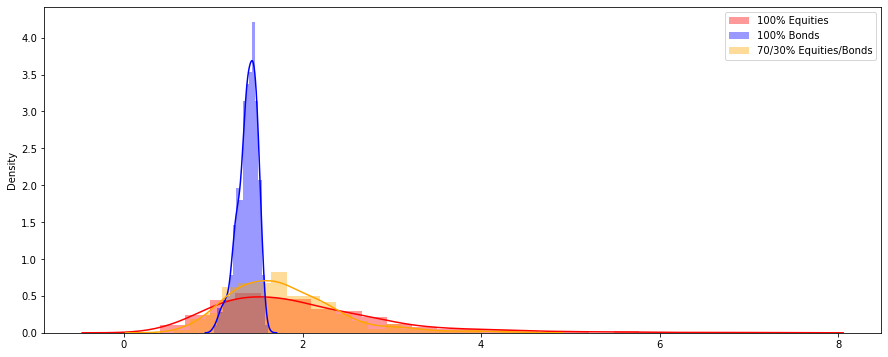

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.distplot(erk.terminal_values(rets_eq), color="red", label="100% Equities")
sns.distplot(erk.terminal_values(rets_bonds), color="blue", label="100% Bonds")
sns.distplot(erk.terminal_values(rets_7030b), color="orange", label="70/30% Equities/Bonds")
plt.legend();

최신 버전에서는 distplot 대신 displot이나 histplot 쓰는게 맞는데 걍 씀.

1 기준으로 채권은 상당히 안정적

# Glide Paths for Allocation

In [123]:
def glidepath_allocator(r1, r2, start_glide=1, end_glide=0):
    """
    r1, r2의 비중을 100:0 부터 0:100 까지 여러 경우의 수로 나눔
    """
    n_points = r1.shape[0]
    n_col = r1.shape[1]
    path = pd.Series(data=np.linspace(start_glide, end_glide, num=n_points))
    paths = pd.concat([path]*n_col, axis="columns")
    paths.index = r1.index
    paths.columns = r1.columns
    return paths

In [124]:
rets_eq

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,-0.015764,0.040751,0.080005,-0.041171,0.031055,0.007965,0.039607,-0.038977,0.061238,-0.014165,...,0.034611,0.003645,-0.008229,-0.059138,0.041909,0.069900,-0.068180,0.018519,-0.013935,-0.020890
2,0.067091,-0.100295,-0.014110,-0.010962,0.002761,0.019622,-0.043248,-0.040889,0.023329,-0.025853,...,-0.019159,0.075598,0.054650,0.039661,0.019987,-0.064555,0.037605,-0.002007,0.005333,0.032250
3,0.033626,-0.003807,0.049686,0.038653,0.012673,0.059476,-0.028148,-0.075412,-0.032937,0.032421,...,-0.064290,0.047363,0.074485,-0.064809,-0.037851,0.040355,-0.036493,-0.042430,0.067977,0.035193
4,0.025310,0.022537,-0.062735,-0.020513,0.004600,0.059896,0.065180,0.041631,0.032071,0.002795,...,0.075392,-0.012242,-0.033627,-0.031755,0.054680,-0.011672,-0.064814,-0.032180,0.031203,0.033787
5,-0.059274,0.046848,0.053654,0.033298,0.019956,0.000389,-0.056101,-0.055500,0.037464,0.015767,...,0.004436,0.017635,-0.026309,-0.037622,-0.113111,0.020257,-0.026098,0.015347,0.013458,0.027840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.011447,-0.059245,-0.017741,-0.065651,0.066911,-0.040082,0.024285,-0.042054,-0.007843,-0.013994,...,-0.017815,-0.056824,0.034658,-0.079577,-0.032342,0.000098,-0.031056,-0.003627,0.016710,-0.053605
117,0.060030,-0.032560,-0.060805,-0.006216,0.036793,0.032543,-0.064504,0.011175,-0.061239,0.023254,...,0.023038,-0.000047,0.023206,-0.057413,0.061646,0.004088,0.046434,0.023644,-0.019177,-0.044323
118,0.015838,0.007148,0.049829,0.020957,-0.049823,0.079796,-0.073460,-0.053273,0.064025,0.021599,...,0.044206,0.008147,-0.037440,-0.062352,-0.043600,0.012247,0.003106,-0.034277,0.006131,0.024707
119,0.060086,0.003607,-0.017952,0.045386,0.042476,-0.026580,0.027906,0.037758,-0.104872,0.005546,...,-0.028757,0.011185,-0.006563,-0.031103,-0.027446,0.023506,0.030645,-0.099813,0.009241,0.005486


In [125]:
rets_eq.shape

(120, 500)

In [129]:
path = pd.Series(data=np.linspace(1, 0, 120))
paths = pd.concat([path]*500, axis=1)

In [130]:
paths

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,...,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597,0.991597
2,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,...,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193,0.983193
3,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,...,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790,0.974790
4,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,...,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387,0.966387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,...,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613,0.033613
116,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,...,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210
117,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,...,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807,0.016807
118,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,...,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403,0.008403


In [131]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator=glidepath_allocator, start_glide=.8, end_glide=.2)
# 80:20부터 20:80까지 계산

In [132]:
pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="Eq"),
    erk.terminal_stats(rets_7030b, name="70/30"),
    erk.terminal_stats(rets_g8020, name="Glide 80 to 20")
], axis="columns")

,FI,Eq,70/30,Glide 80 to 20
mean,1.380576,1.982085,1.788819,1.664923
std,0.111388,1.002105,0.617444,0.434330
p_breach,NaN,0.044000,0.018000,0.004000
e_short,NaN,0.172108,0.081702,0.100021
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


# Dynamic Risk Budgeting

In [133]:
n_scenarios = 5000
rates, zc_prices = erk.cir(10, n_scenarios=n_scenarios, b=.03, r_0=.03, sigma=.02)  ## 채권 가격
price_eq = erk.gbm(n_years=10, n_scenarios=n_scenarios, mu=.07, sigma=.15)  ## 주식 가격

In [134]:
rets_eq = price_eq.pct_change().dropna()  ## 주식 수익률
rets_zc = zc_prices.pct_change().dropna()  ## 채권 수익률
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator=erk.fixedmix_allocator, w1=.7)  ## 주식7 채권3
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="Z70/30", floor=.75)],
           axis='columns').round(2)

,ZC,Eq,Z70/30
mean,1.34,1.95,1.75
std,0.00,0.97,0.59
p_breach,NaN,0.04,0.01
e_short,NaN,0.13,0.08
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [135]:
def floor_allocator(psp_r, ghp_r, floor, zc_prices, m=3):
    """
    CPPI에서 했던 것과 똑같이 Floor를 정해두고 그 이하에서는 100% 채권만 보유
    Floor 이상에서는 m값에 따라서 주식 보유 비중 조정
    """
    if zc_prices.shape != psp_r.shape:
        raise ValueError("PSP and ZC Prices must have the same shape")
    n_steps, n_scenarios = psp_r.shape
    account_value = np.repeat(1, n_scenarios)  ## 모든 시나리오의 처음 시작 자산 '1'
    floor_value = np.repeat(1, n_scenarios)  ## floor는 그냥 '1'로 채워줌(밑에서 업데이트)
    w_history = pd.DataFrame(index=psp_r.index, columns=psp_r.columns)  ## 같은 모양
    for step in range(n_steps):
        floor_value = floor*zc_prices.iloc[step]  ## 각 시점에서 floor*채권가격 값
        cushion = (account_value - floor_value)/account_value
        psp_w = (m*cushion).clip(0, 1)  ## 주식에 투자(PSP)하는 비율 / 미니멈 0, 멕시멈 1
        ghp_w = 1-psp_w  ## 채권에 투자(GHP)하는 비율
        psp_alloc = account_value*psp_w
        ghp_alloc = account_value*ghp_w
        
        # 각 시점마다의 자산
        account_value = psp_alloc*(1+psp_r.iloc[step]) + ghp_alloc*(1+ghp_r.iloc[step])
        w_history.iloc[step] = psp_w
    return w_history  ## 각 시점의 주식 비중 => allocator 값으로 사용할거라서

In [137]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=.75, zc_prices=zc_prices[1:])
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="70/30", floor=.75),
           erk.terminal_stats(rets_floor75, name="Floor75", floor=.75)
          ],
           axis='columns').round(2)

,ZC,Eq,70/30,Floor75
mean,1.34,1.95,1.75,1.93
std,0.00,0.97,0.59,0.97
p_breach,NaN,0.04,0.01,NaN
e_short,NaN,0.13,0.08,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


수익률이 조금 줄어들지만, floor 아래로 내려가는 경우를 방어

In [144]:
rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=.75, zc_prices=zc_prices[1:], m=1)
rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=.75, zc_prices=zc_prices[1:], m=5)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="70/30", floor=.75),
           
           erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=.75),
           erk.terminal_stats(rets_floor75, name="Floor75m3", floor=.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=.75)
          ],
           axis='columns').round(4)

,ZC,Eq,70/30,Floor75m1,Floor75m3,Floor75m5
mean,1.3433,1.9507,1.7450,1.6135,1.9271,1.9370
std,0.0000,0.9677,0.5911,0.4271,0.9728,0.9755
p_breach,NaN,0.0364,0.0080,NaN,NaN,NaN
e_short,NaN,0.1316,0.0787,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


당연히 m값이 커지면 변동성이 증가하고 수익률도 증가함

그래도 floor를 안정했을 때와 비교하면 e_short가 크게 줄어듦

# Risk Budgeting with Drawdown Constraints

In [145]:
def drawdown_allocator(psp_r, ghp_r, maxdd, m=3):
    """
    floor를 전고점 기준으로 설정(CPPI에서 했던거랑 똑같음)
    """
    n_steps, n_scenarios = psp_r.shape
    account_value = np.repeat(1, n_scenarios)
    floor_value = np.repeat(1, n_scenarios)
    peak_value = np.repeat(1, n_scenarios)
    w_history = pd.DataFrame(index=psp_r.index, columns=psp_r.columns)
    for step in range(n_steps):
        floor_value = (1-maxdd)*peak_value  ## 전고점을 기준으로 (1-MDD)를 floor로 설정
        cushion = (account_value - floor_value)/account_value
        psp_w = (m*cushion).clip(0, 1)
        ghp_w = 1-psp_w
        psp_alloc = account_value*psp_w
        ghp_alloc = account_value*ghp_w
        
        account_value = psp_alloc*(1+psp_r.iloc[step]) + ghp_alloc*(1+ghp_r.iloc[step])
        peak_value = np.maximum(peak_value, account_value)  ## 전고점
        w_history.iloc[step] = psp_w
    return w_history

단기 부채의 경우 채권이 아니라 현금으로 부채를 상환할 수 있다.

그럼 현금의 경우는?

In [147]:
cashrate = .02  ## 예금 연이자 2%
monthly_cashreturn = (1+cashrate)**(1/12) - 1

# 현금만 들고 있는 경우
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_eq.index, columns=rets_eq.columns)
# MDD 25%인 경우
rets_maxdd25 = erk.bt_mix(rets_eq, rets_cash, allocator=erk.drawdown_allocator, maxdd=.25)

pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="70/30", floor=.75),
           
           erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=.75),
           erk.terminal_stats(rets_floor75, name="Floor75m3", floor=.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=.75),
           erk.terminal_stats(rets_maxdd25, name="MaxDD25m3", floor=.75)
          ],
           axis='columns').round(4)

,ZC,Eq,70/30,Floor75m1,Floor75m3,Floor75m5,MaxDD25m3
mean,1.3433,1.9507,1.7450,1.6135,1.9271,1.9370,1.6183
std,0.0000,0.9677,0.5911,0.4271,0.9728,0.9755,0.5351
p_breach,NaN,0.0364,0.0080,NaN,NaN,NaN,NaN
e_short,NaN,0.1316,0.0787,NaN,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"]  ## 각 시나리오마다의 MDD

0      -0.198196
1      -0.170823
2      -0.104337
3      -0.162412
4      -0.171870
          ...   
4995   -0.141717
4996   -0.101744
4997   -0.164791
4998   -0.127706
4999   -0.125373
Name: Max Drawdown, Length: 5000, dtype: float64

In [149]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].min()  ## 5000개 시나리오 중에서 Worst MDD

-0.2329037215240886

/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

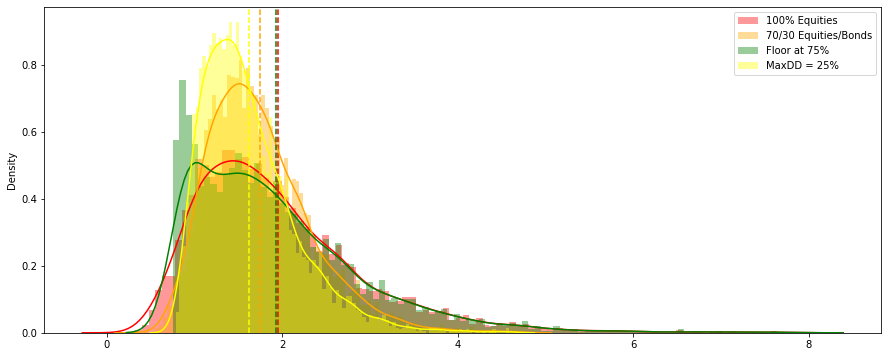

In [151]:
# 각 경우의 최종수익
tv_eq = erk.terminal_values(rets_eq)
tv_zc = erk.terminal_values(rets_zc)
tv_7030b = erk.terminal_values(rets_7030b)
tv_floor75 = erk.terminal_values(rets_floor75)
tv_maxdd = erk.terminal_values(rets_maxdd25)


#Plot
plt.figure(figsize=(15,6))
sns.distplot(tv_eq, color='red', label='100% Equities', bins=100)
plt.axvline(tv_eq.mean(), ls='--', color='red')
sns.distplot(tv_7030b, color='orange', label='70/30 Equities/Bonds', bins=100)
plt.axvline(tv_7030b.mean(), ls='--', color='orange')
sns.distplot(tv_floor75, color='green', label='Floor at 75%', bins=100)
plt.axvline(tv_floor75.mean(), ls='--', color='green')
sns.distplot(tv_maxdd25, color='yellow', label='MaxDD = 25%', bins=100)
plt.axvline(tv_maxdd25.mean(), ls='--', color='yellow')
plt.legend();

Floor 75%의 경우랑 100% Eq의 경우 평균이 고만고만함.

Floor 75%는 아래쪽(floor 75%)에 몰려있는 경향.

# Drawdown constraint with Historical Data

<AxesSubplot:>

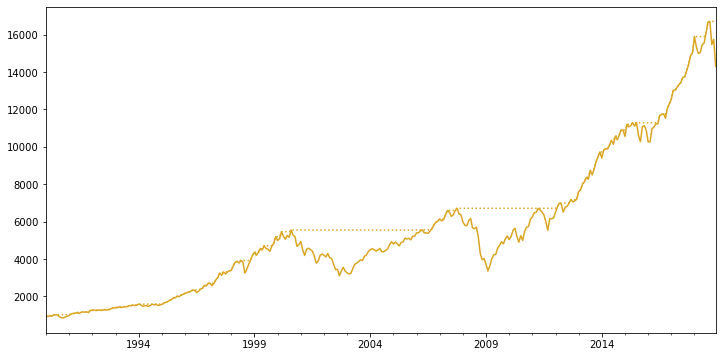

In [152]:
rets_tmi = erk.get_total_market_index_returns()["1990":]  ## 1990년 이후 시장수익률
dd_tmi = erk.drawdown(rets_tmi)
ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls='-', color='goldenrod')
dd_tmi["Peaks"].plot(ax=ax, ls=':', color='goldenrod')

<AxesSubplot:>

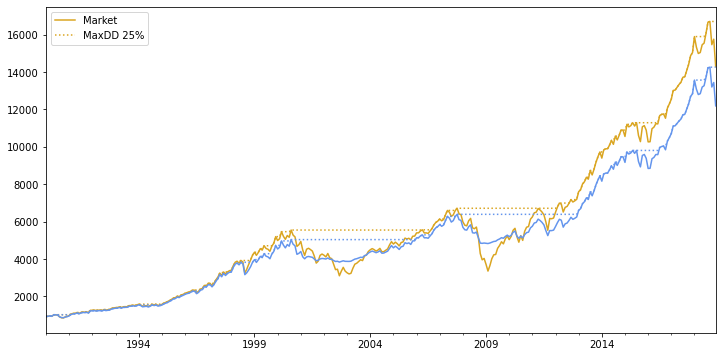

In [155]:
# 현금!
cashrate = .03
monthly_cashreturn = (1+cashrate)**(1/12) - 1
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_tmi.index, columns=[0])

# MDD 25%인 경우 시장과 현금 배분했을 때 수익률(위에서 했던거 똑같이)
rets_maxdd25 = erk.bt_mix(pd.DataFrame(rets_tmi), rets_cash, allocator=erk.drawdown_allocator, maxdd=.25, m=5)

dd_25 = erk.drawdown(rets_maxdd25[0])

#노란색은 MDD없이 100% 시장에 투자
ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls='-', color='goldenrod', label = 'Market', legend=True)
dd_tmi["Peaks"].plot(ax=ax, ls=':', color='goldenrod')

# 파랑색은 MDD 25%로 설정하고 현금이랑 시장에 적절하게 배분해서 투자
dd_25["Wealth"].plot(ax=ax, label="MaxDD 25%", color="cornflowerblue", legend=True)
dd_25["Peaks"].plot(ax=ax, color='cornflowerblue', ls=":")

In [154]:
erk.summary_stats(pd.concat([rets_tmi.rename("Market"), rets_maxdd25[0].rename("MaxDD")], axis="columns"))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Market,0.096058,0.145419,-0.668827,4.247282,0.066949,0.094633,0.441951,-0.499943
MaxDD,0.090062,0.112755,-0.630463,5.015334,0.049978,0.071074,0.518327,-0.244212


MDD가 거의 1/2로 줄어들고 SR향상. 전반적으로 큰 손해가 발생하는 경우에 많이 방어되는 반면 수익률은 조금 줄어듦. 당연!